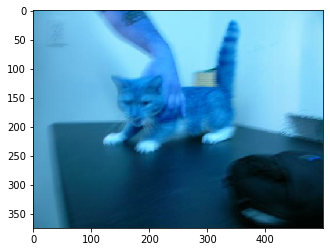

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Dell/Documents/Internship/PetImages"

CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.imread(os.path.join(path,img))
        #plt.imshow(img_array, cmap='gray')  # graph it
        plt.imshow(img_array)
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [9]:
print(img_array.shape)

(375, 500, 3)


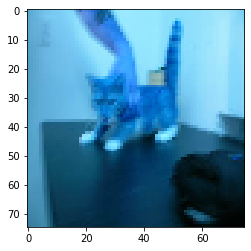

In [10]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap='gray')
plt.imshow(new_array)
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [03:53<00:00, 53.48it/s] 

24946


In [12]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
1
0
1
0
1


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[126]
   [115]
   [117]
   ...
   [160]
   [159]
   [161]]

  [[160]
   [159]
   [161]
   ...
   [136]
   [136]
   [136]]

  [[132]
   [132]
   [132]
   ...
   [ 84]
   [ 87]
   [ 78]]

  ...

  [[157]
   [156]
   [158]
   ...
   [170]
   [173]
   [164]]

  [[168]
   [171]
   [162]
   ...
   [148]
   [151]
   [142]]

  [[149]
   [152]
   [143]
   ...
   [ 80]
   [ 80]
   [ 80]]]


 [[[158]
   [161]
   [152]
   ...
   [168]
   [171]
   [162]]

  [[168]
   [171]
   [162]
   ...
   [148]
   [148]
   [148]]

  [[148]
   [149]
   [145]
   ...
   [ 80]
   [ 80]
   [ 80]]

  ...

  [[155]
   [155]
   [155]
   ...
   [142]
   [146]
   [147]]

  [[142]
   [150]
   [150]
   ...
   [130]
   [114]
   [108]]

  [[152]
   [136]
   [130]
   ...
   [127]
   [111]
   [ 98]]]


 [[[159]
   [159]
   [159]
   ...
   [153]
   [156]
   [164]]

  [[142]
   [150]
   [157]
   ...
   [149]
   [133]
   [127]]

  [[136]
   [120]
   [114]
   ...
   [140]
   [118]
   [106]]

  ...

  [[117]
   [ 95]
   [ 90]
   

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [17]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(74838, 75, 75, 1) float64
(24946,) int32


In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

In [ ]:
model.save('CNNImage.model')

In [ ]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

predictions = model.predict([prepare('aaas.jpg')])
print('Its a '+CATEGORIES[int(predictions[0][0])])

In [1]:
import cv2
import tensorflow as tf

CATEGORIES = ["Cat", "Dog"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("CNNImage.model")

prediction = model.predict([prepare('aaas.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Dog


In [18]:
from keras import layers
from keras import models
from keras.applications import InceptionResNetV2

In [19]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75,75,3))

In [20]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 37, 37, 32)   96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 37, 37, 32)   0           batch_normalization_204[0][0]    
________________________________________________________________________________

In [21]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [23]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

ValueError: Error when checking input: expected inception_resnet_v2_input to have shape (75, 75, 3) but got array with shape (75, 75, 1)